# Data Science Blog Post

# 1. Business Understanding:

the *airbnb* platform has been one of the great appearances of the last years. a simple idea that combined technological virtues with face-to-face contact between tourists and residents. A disruptive concept in a sector that was stuck in a single business model. However, the latest events pose a completely different picture ...
COVID-19 has a dramatic and unexpected impact on today's societies, forcing 4 billion people to stay locked up in their homes to contain this pandemic. In the same year that the San Francisco company was preparing to go public, this happens and ends up firing 1500 people almost 1/4 of its workers plant.

It is a clear message from one of the giants in the sector. Understand that tourism will cease to exist at least as we knew it. This new context will require adapting custom and habits on a personal level and facing great efforts on the part of nations to keep their populations safe.
the indiscriminate opening of cities that turned to the tourist sector as a reliable source, with low costs, with a controlled environmental impact, will be forced to produce a reconversion. Barcelona is a very appropriate example to study this phenomenon.
In recent years, the debates surrounding the touristization of traditional neighborhoods have been heating up. On the one hand, neighbors are forced to move out of their neighborhoods due to the increase in the cost of living. On the other hand, merchants see the opportunity to pursue an increasing and constantly changing demand that brings concrete benefits. The focus of this spiral is the business of airBnB, being a platform that allocates the residence space for tourist use, licenses taking advantage of the hosts, the increase in the cost of regular rentals are all arguments against the platform. Let's see what your data tells us ...
> Firstly, would it be interesting to see how the price of the listings varies throughout the year? and what relationship does it have with availability? After 2 months of confinement and social seclusion, the consequences of COVID-19 are already  expressed in these values. 
Also, how do airbnb listings vary by neighborhood? They have the same impact in the different neighborhoods of the city? What consequences has it had on the rental housing market?  
Finally, on the other side of the debate, we wonder how it affects the micro level. is it possible to live on the income of airbnb? Are there hosts that exercise it professionally?  

# 2. Data Understanding

To do the study, we extract the datasets from the page insideairbnb.com. All the listings divided into different types of content are registered in it.
for it we will download 2 datasets: calendar and listings (we decided to use the limited listings since with the information it contains we can answer our problems)
- ***calendar***: do not indicate the adjusted value of the price of each of the listings throughout the year. it has 7 million flashes and 6 culumnas
- ***listings***: provides us with specific and specific information about the publications. 21000 rows contains all the publications of the city of Barcelona and information on the location, the type of accommodation it offers, what reviews it has, who is its host and others.

# 3. Data Preparation

In [ ]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import dates as mpl_dates
import geojson
import folium

%matplotlib inline

> como contamos con dos bases de datos vamos a dividir, vamos a concentrarnos primero en preparar calendar.csv y luego listings.csv.

##  3.1 Calendar dataframe:
*Detailed Calendar Data for listings in Barcelona*

In [2]:
# to compare we take te calendar information form 2020 and for 2019.
df_calendar_2019 = pd.read_csv(r'http://data.insideairbnb.com/spain/catalonia/barcelona/2019-03-08/data/calendar.csv.gz')
df_calendar_2020 = pd.read_csv(r'http://data.insideairbnb.com/spain/catalonia/barcelona/2020-03-16/data/calendar.csv.gz')

In [3]:
# looking after missing values
df_calendar_2019.isna().mean()

listing_id        0.0
date              0.0
available         0.0
price             0.0
adjusted_price    0.0
minimum_nights    0.0
maximum_nights    0.0
dtype: float64

In [4]:
# looking after missing values
df_calendar_2020.isna().mean()

listing_id        0.0
date              0.0
available         0.0
price             0.0
adjusted_price    0.0
minimum_nights    0.0
maximum_nights    0.0
dtype: float64

### Assessments:

##### Calendar DataFrame:
- wrong data type: 
    - date: to datetime
    - price/adjusted_price to numeric
    - available: to boolean


In [5]:
#Create a function to convert price and adjust_price to interger(replace wrong characters & us pd.to_numeric)
def price_to_currency(df, col_price):
    df[col_price] = pd.to_numeric(df[col_price].str.replace('$','').str.replace(',', ''))
    return df

In [6]:
def clean_calendar(df, date_col, price_col, adj_price_col, bool_col, end_date):
    # converting the datatype to datetime
    df[date_col] = pd.to_datetime(df[date_col], dayfirst=True)
    
    # use the function in the pertinents columns
    df = price_to_currency(df, price_col)
    df = price_to_currency(df, adj_price_col)
    
    # replace availability column with a boolean function
    df = df.replace({bool_col:{'t': True, 'f':False}})
    
    #drop inconsistent values for utcoming years
    df = df.loc[df[date_col] < end_date]
    
    return df
    
    

In [7]:
df_calendar_2019 = clean_calendar(df_calendar_2019, 'date', 'price', 'adjusted_price', 'available', '2020-01-01')
df_calendar_2020 = clean_calendar(df_calendar_2020, 'date', 'price', 'adjusted_price', 'available', '2021-01-01')

In [8]:
df_calendar_2020.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,264125,2020-03-16,True,89.0,89.0,3,90
1,73700,2020-03-16,False,100.0,100.0,2,90
2,73700,2020-03-17,False,100.0,100.0,2,90
3,73700,2020-03-18,False,100.0,100.0,2,90
4,73700,2020-03-19,False,100.0,100.0,2,90


### Listings dataframe
*Summary information and metrics for listings in Barcelona (good for visualisations).*

###### Listings DataFrame:
- wrong data type:
    - last_review: to datetime
    
- missing values:
    - last_review / review per month: drop columns 


In [11]:
df_listings = pd.read_csv(r'http://data.insideairbnb.com/spain/catalonia/barcelona/2020-03-16/visualisations/listings.csv')
df_listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,23197,Forum DeLuxe 5 mins Walk To CCIB Center & Sea★,90417,Etain (Marnie),Sant Martí,el Besòs i el Maresme,41.41291,2.22063,Entire home/apt,220,3,52,2019-12-15,0.47,2,343
1,25786,NICE ROOM AVAILABLE IN THE HEART OF GRACIA,108310,Pedro,Gràcia,la Vila de Gràcia,41.40145,2.15645,Private room,42,1,274,2020-03-15,2.34,1,117
2,31958,"Gaudi Attic 1, Friendly Rentals",136853,Fidelio,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.40950,2.15938,Entire home/apt,60,1,187,2020-01-07,1.69,30,278
3,32471,"Gaudi Attic 2, Friendly Rentals",136853,Fidelio,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.40928,2.16112,Entire home/apt,65,1,93,2020-03-01,0.83,30,268
4,32711,Sagrada Familia area - Còrsega 1,135703,Nick,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.40566,2.17015,Entire home/apt,140,2,63,2020-02-22,0.60,13,290


In [12]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21116 entries, 0 to 21115
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              21116 non-null  int64  
 1   name                            21101 non-null  object 
 2   host_id                         21116 non-null  int64  
 3   host_name                       21109 non-null  object 
 4   neighbourhood_group             21116 non-null  object 
 5   neighbourhood                   21116 non-null  object 
 6   latitude                        21116 non-null  float64
 7   longitude                       21116 non-null  float64
 8   room_type                       21116 non-null  object 
 9   price                           21116 non-null  int64  
 10  minimum_nights                  21116 non-null  int64  
 11  number_of_reviews               21116 non-null  int64  
 12  last_review                     

In [13]:
df_listings.room_type.value_counts()

Private room       10840
Entire home/apt     9626
Hotel room           419
Shared room          231
Name: room_type, dtype: int64

> ya contamos con los datasets en correctas condiciones podemos comenzar a invetgiar y orientar el analisis para aclarar nuestras problematicas.

# 4. Questions

## 4.1 como varia el precio de los listings a lo largo del año? 

> observemos de que manera variaron los precios entre los ultimos dos años. vamos a definir una funcion para poder compara la curva de los precios con la de la disponibilidad. asi podemos observar en que momentos del año succeden las mayores congestiones turisticas y como se ajustan los precios de los listings de airbnb.

In [9]:
def group_date(df, date_col):
    # new df grouped
    new_df = df.groupby(by=date_col).mean().reset_index()
    
    return new_df
    

In [10]:
df_2019_daily = group_date(df_calendar_2019, 'date')
df_2020_daily = group_date(df_calendar_2020, 'date')

In [15]:
def time_lineplots(df,date_col, col_var_1, col_var_2, year):
    """
    inputs: 
    dataframe
    feature with date information
    variable 1: price
    variable 2:
    year: 
    
    output:
    none
    """

    plt.figure(figsize=(16,4))

    plt.style.use('seaborn')

    x_value = df[date_col]
    y_variable_1 = df[col_var_1]
    y_variable_2 = df[col_var_2]*100

    base_color = sns.color_palette()[0]
    plt.plot_date(x_value, y_variable_1, linestyle='solid', color=base_color, ms=6, markevery=7)
    plt.gcf().autofmt_xdate
    plt.title('Barcelona listings mean price in {}'.format(year))
    plt.ylabel('price')
    plt.xlabel('date')

    plt.figure(figsize=(16,4))

    base_color = sns.color_palette()[1]
    plt.plot_date(x_value, y_variable_2, linestyle='solid', color=base_color, ms=6, markevery=7)
    plt.gcf().autofmt_xdate
    plt.title(' Barcelona listings availability in {}'.format(year))
    plt.ylabel('availability')
    plt.xlabel('date');

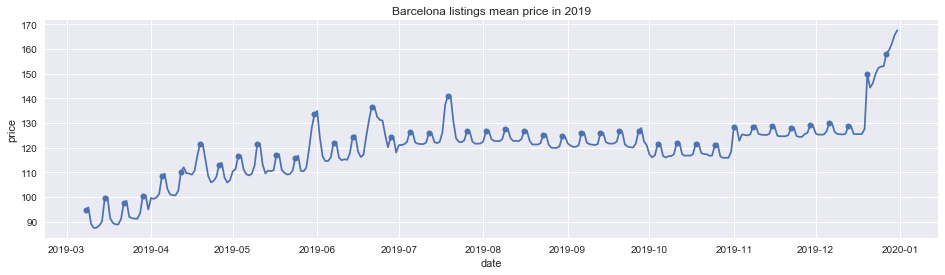

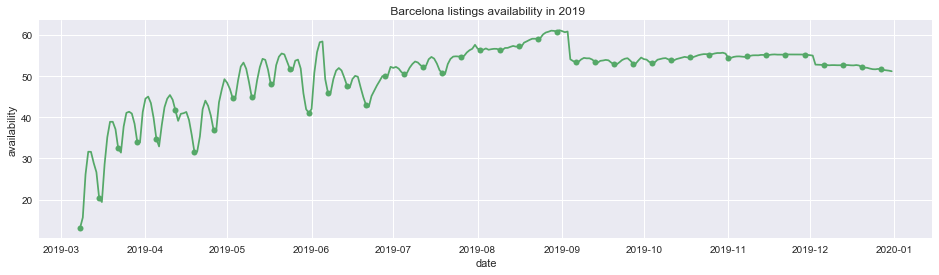

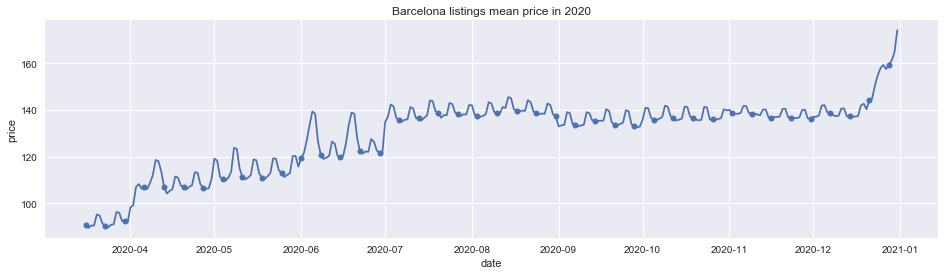

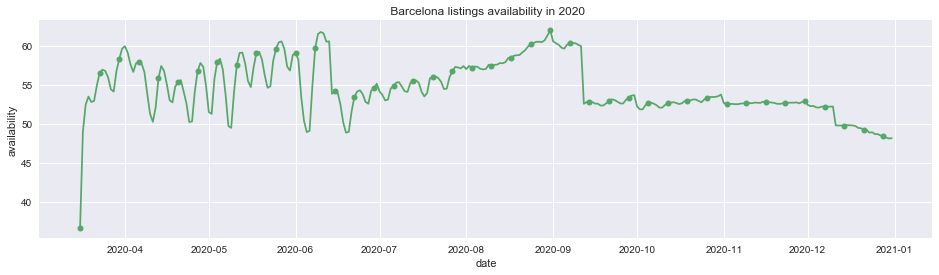

In [16]:
time_lineplots(df_2019_daily, 'date', 'adjusted_price', 'available', '2019')
time_lineplots(df_2020_daily, 'date', 'adjusted_price', 'available', '2020')

In [30]:
#group by day of the wwek the
df_week_day_2020 = group_date(df_calendar_2020, df_calendar_2020.date.dt.day_name())
df_week_day_2019 = group_date(df_calendar_2019, df_calendar_2019.date.dt.day_name())

In [32]:
# list with the order of the days
# new variable with the days of the week
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']
df_calendar_2020['day_of_week'] = df_calendar_2020.date.dt.day_name()

Text(0, 0.5, 'mean price/night (in euros)')

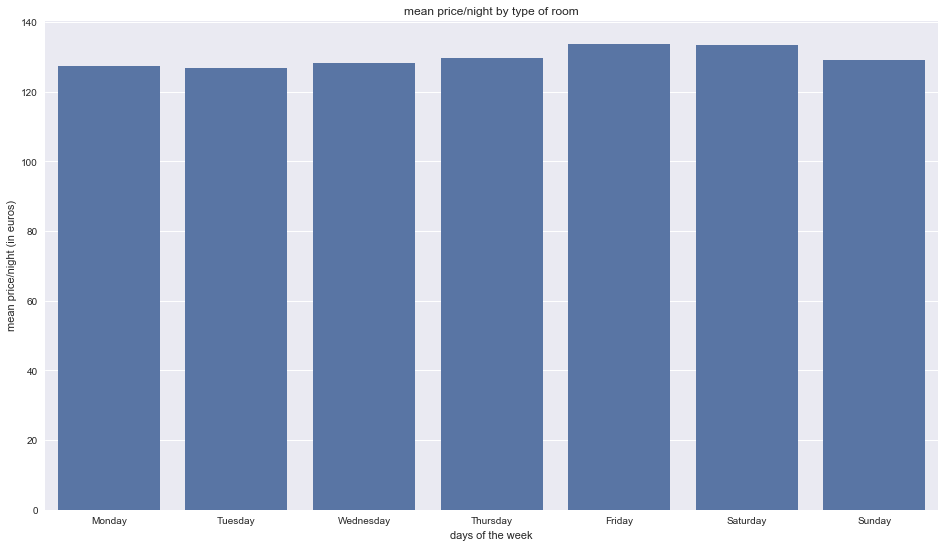

In [27]:
# plot the average price by year
plt.figure(figsize=(16,9))
base_color = sns.color_palette()[0]
sns.barplot(data = df_w, x = 'day_of_week', y='price',hue='r' color = base_color, ci=0.95, order= days)

plt.title('mean price/night by type of room')
plt.xlabel('days of the week')
plt.ylabel('mean price/night (in euros)')

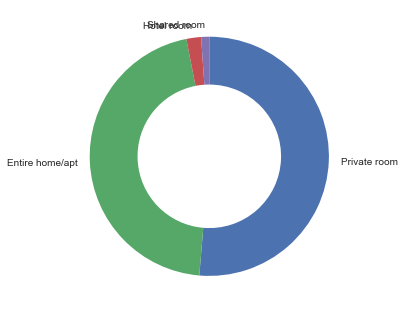

In [31]:
# pieplot with the count of the types of rooms
sorted_counts = df_listings['room_type'].value_counts()
base_color = sns.color_palette()[0]
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4});


c:\program files\python38\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


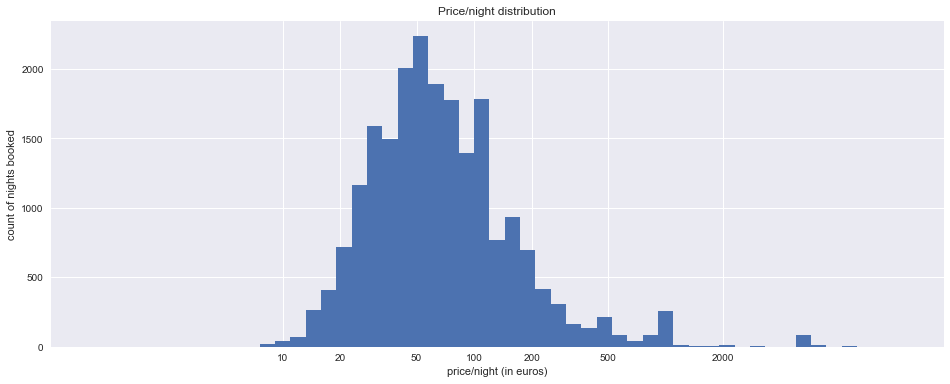

In [34]:
# price/night distributions
plt.figure(figsize=(16,6))
plt.style.use('seaborn')
bins_edges = 10**np.arange(0, np.log10(df_listings['price']).max()+0.08,0.08)
plt.hist(data=df_listings, x='price', bins=bins_edges)
plt.xscale('log')
ticks=[10, 20, 50, 100, 200, 500, 2000 ]
labels = ['{}'.format(i) for i in ticks]
plt.xticks(ticks, labels)

plt.xlabel('price/night (in euros)')
plt.ylabel('count of nights booked')
plt.title('Price/night distribution');


Text(0, 0.5, 'mean price/night (in euros)')

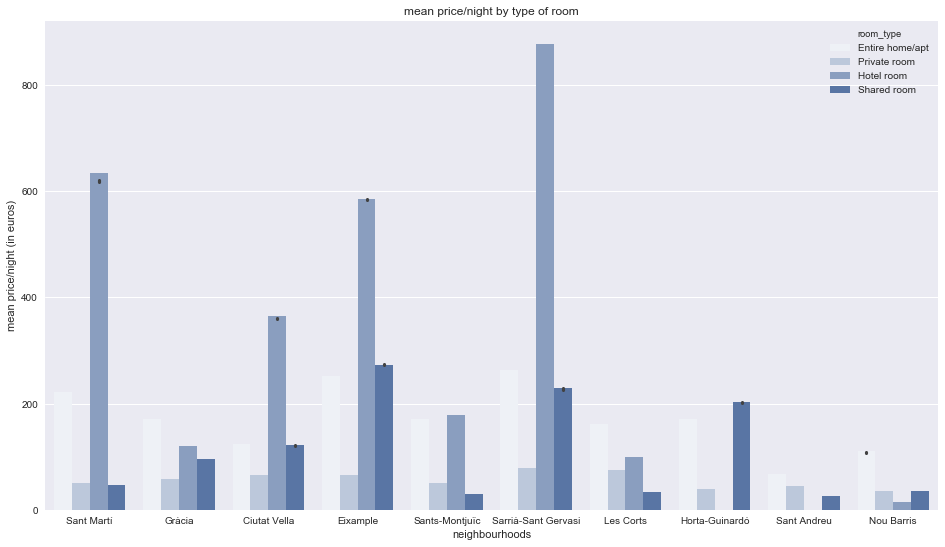

In [35]:
# price by neighbouhood and by room type
plt.figure(figsize=(16,9))
base_color = sns.color_palette()[0]
sns.barplot(data = df_listings, x = 'neighbourhood_group', y='price', hue = 'room_type', color = base_color, ci=0.95)

plt.title('mean price/night by type of room')
plt.xlabel('neighbourhoods')
plt.ylabel('mean price/night (in euros)')


## 4.2 listings by neighbourhood

In [37]:
dict_names = {'Sarrià-Sant Gervasi':'05','Eixample':'02','Gràcia':'06',
              'Les Corts':'04', 'Sant Martí':'10','Ciutat Vella':'01',
              'Sants-Montjuïc':'03','Horta-Guinardó':'07', 'Sant Andreu':'08',
              'Nou Barris':'09'}

# using the dict_names dictionary to generate the new column
def get_distr(neigh): 
    """
    input: neighbourhoods
    output: data series with the new values
    """
    for key, value in dict_names.items():
        if neigh == key:
            return value 

In [38]:
df_listings['neighbourhood_group_codi'] = df_listings['neighbourhood_group'].apply(lambda x: get_distr(x))

In [39]:
# groupby  codi 
df_districte_room_type = df_listings.groupby(by='neighbourhood_group_codi').agg(
    {'price':'mean','reviews_per_month':'mean', 'number_of_reviews':'sum','id': 'count'}).reset_index()

In [40]:
#import the geojson with the neighbourhoos fo barelona
with open(r'data_bases/districtes.geojson') as f:
    geo_districts = geojson.load(f)

In [41]:
def choroplet_map(geo_map, df, ref_col, var_col, title):
    m = folium.Map(location=[41.3902, 2.1540], 
                   zoom_start=12,
                   tiles='Stamen Terrain')

    m.choropleth(
        geo_data=geo_districts,
        name='choropleth',
        data=df,
        columns=[ref_col,var_col],
        key_on="properties.DISTRICTE",
        fill_color= 'BuPu',
        fill_opacity=0.8,
        line_opacity=0.2,

        legend_name= title
    )
    folium.LayerControl().add_to(m)
    m.save('airbnb{}.html'.format(title))
    return m

In [42]:
choroplet_map(geo_districts, df_districte_room_type, 'neighbourhood_group_codi', 'price', 'average price by night by neigbourhood')

c:\program files\python38\lib\site-packages\folium\folium.py:411: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [43]:
choroplet_map(geo_districts, df_districte_room_type, 'neighbourhood_group_codi', 'number_of_reviews', 'number of reviews by neigbourhood')

In [ ]:
df_listings.columns

In [45]:
#group by host
df_hosts = df_listings.groupby(by='host_name').agg(
    {'price':'mean', 'number_of_reviews':'sum','reviews_per_month': 'mean', 'id':'count'}).reset_index()

#new column separating the professional hosts from the individuals
professional_hosts = df_hosts.loc[df_hosts.id>5]['host_name'].tolist()
df_listings['host_type']=np.where(df_listings.host_name.isin(professional_hosts), 'professional_host', 'regular_host')

In [60]:
df_hosts_top.columns

Index(['host_name', 'price', 'number_of_reviews', 'reviews_per_month', 'id'], dtype='object')

Text(0, 0.5, 'count of listings')

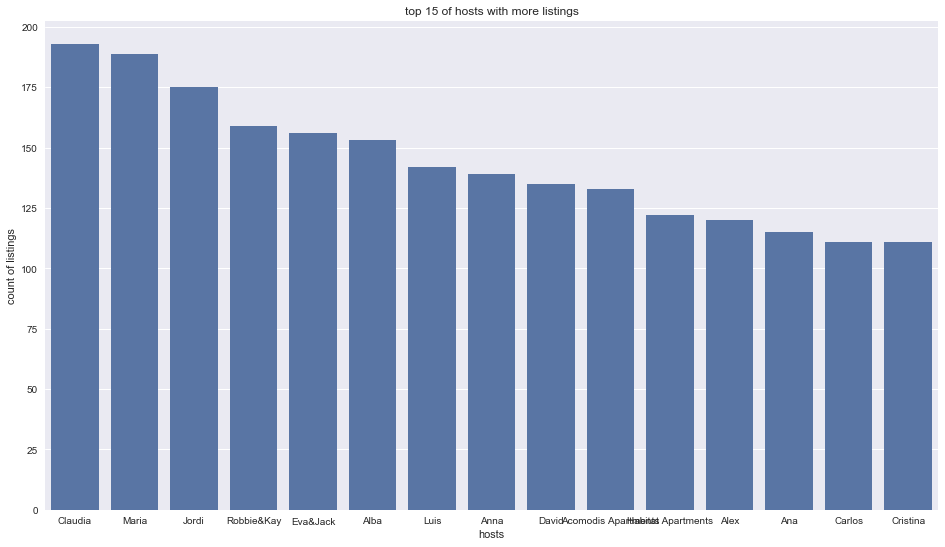

In [64]:

# sort by number of listings
df_hosts_top = df_hosts.sort_values(by='id', ascending=False).head(15)

plt.figure(figsize=(16,9))
base_color = sns.color_palette()[0]
sns.barplot(data = df_hosts_top, x ='host_name', y='id', color = base_color, ci=0.90)

plt.title('top 15 of hosts with more listings')
plt.xlabel('hosts')
plt.ylabel('count of listings')

In [ ]:
df_listings.columns

Text(0, 0.5, 'mean price/night (in euros)')

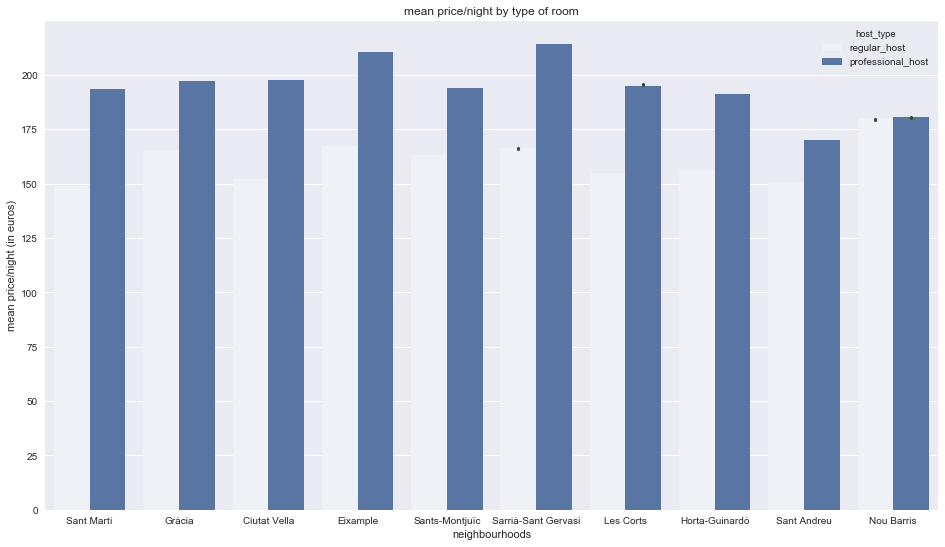

In [46]:
#plot the price by neighbourhood dividing the host type
plt.figure(figsize=(16,9))
base_color = sns.color_palette()[0]
sns.barplot(data = df_listings, x = 'neighbourhood_group', y='availability_365', hue = 'host_type', color = base_color, ci=0.90)

plt.title('mean price/night by type of room')
plt.xlabel('neighbourhoods')
plt.ylabel('mean price/night (in euros)')